In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0300-09.aice.nc')
plotvar = data.variables['aice'][0,:,:]
lont = data.variables['lont_bounds'][:,:,0]
latt = data.variables['latt_bounds'][:,:,0]

In [3]:
#data2=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0300-09.hi.nc')
#plotvar2 = data2.variables['hi'][0,:,:]
##lont = lont[:,:]
#latt = latt[:,:]
#plotvar = plotvar[:,:]

In [4]:
lont2 = lont[200:,1100]
latt2 = latt[200:,1100]

In [5]:
#################################################################
nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([250,240,230,220,210,190,180,170,150,130,110,100,90,80,70,60,50,40,30,20,10,0])
new_cmap = cols.ListedColormap(lev_cmap,"Blues")
#nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
nice_levels = [0,10,20,30,40,50,60,70,80,90,100]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#################################################################

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


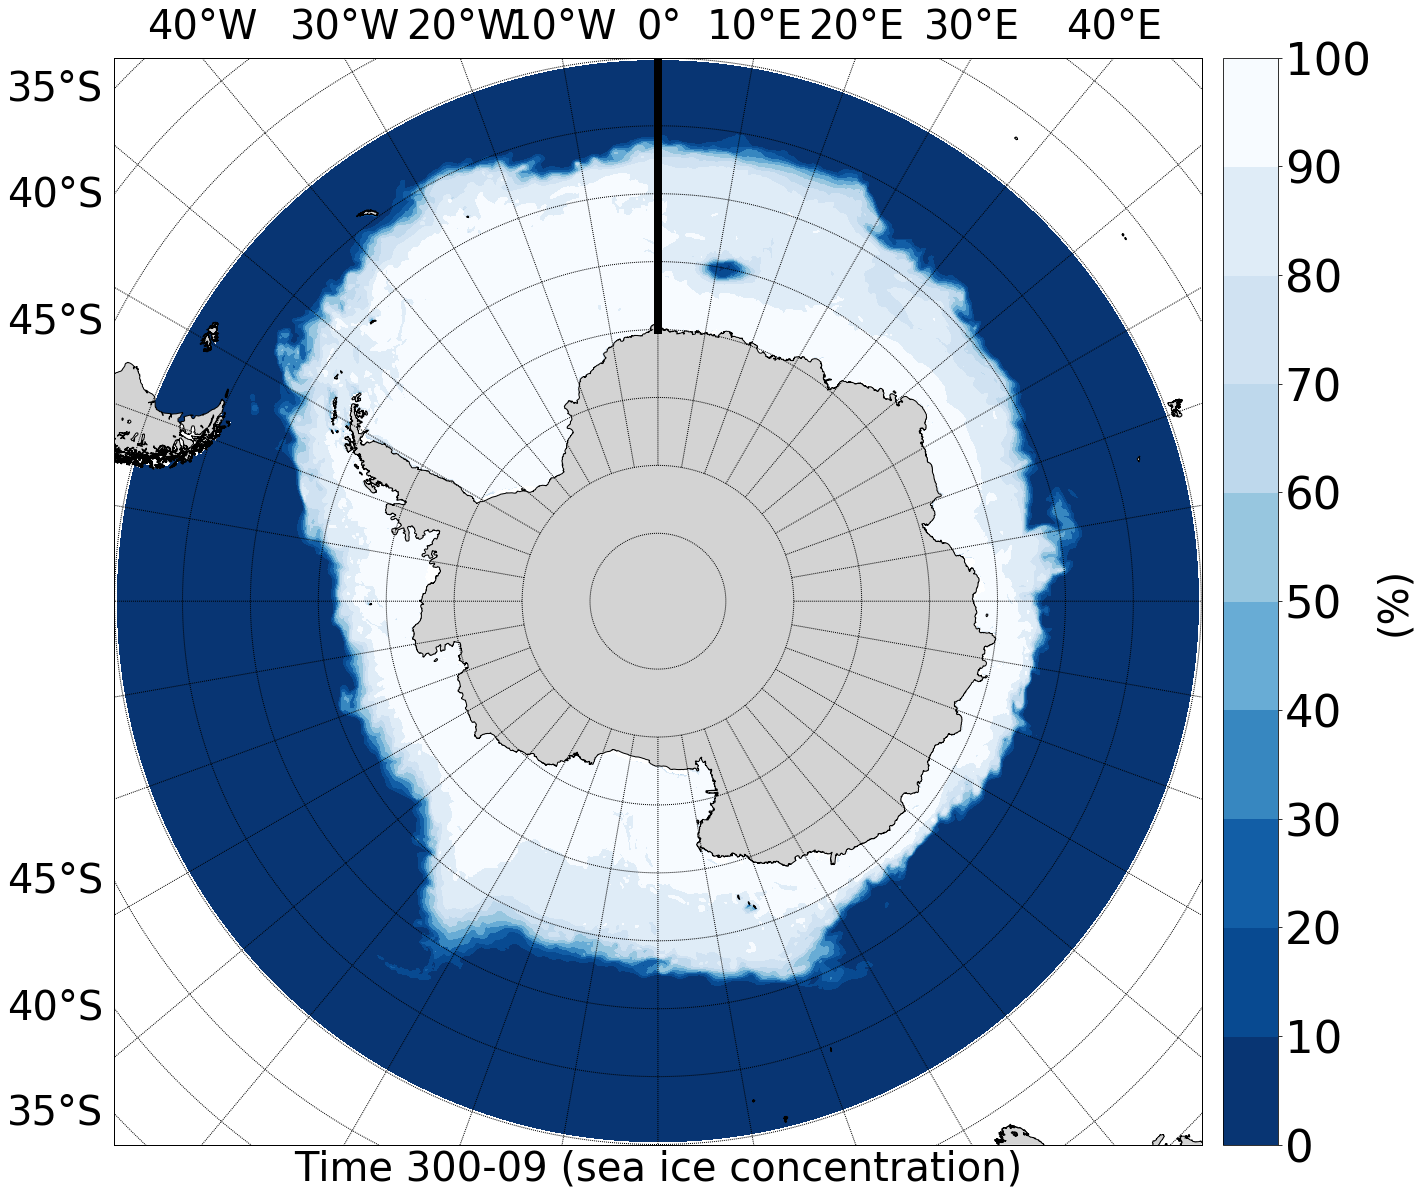

In [6]:
plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'40'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
              #width = 10000000,height = 15000000,resolution ='h')     
              width = 8900000,height = 8900000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar,range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels)
x2,y2=map(lont2,latt2)
map.plot(x2,y2,'black',linewidth=8)

#CS=map.contour(x,y,plotvar2,[0.1,0.3],colors = 'green', linestyles = 'solid',linewidths=2)
#plt.clabel(CS,fontsize=30,fmt='%1.1f')

cbar =map.colorbar(CP,ticks = nice_levels)
cbar.ax.tick_params(labelsize=45) 
cbar.set_label('(%)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
plt.xlabel("Time 300-09 (sea ice concentration)",**my_font)
plt.savefig("ice30009new.png",bbox_inches='tight')

In [7]:
onepoint = np.loadtxt('onepointSSS.out')

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


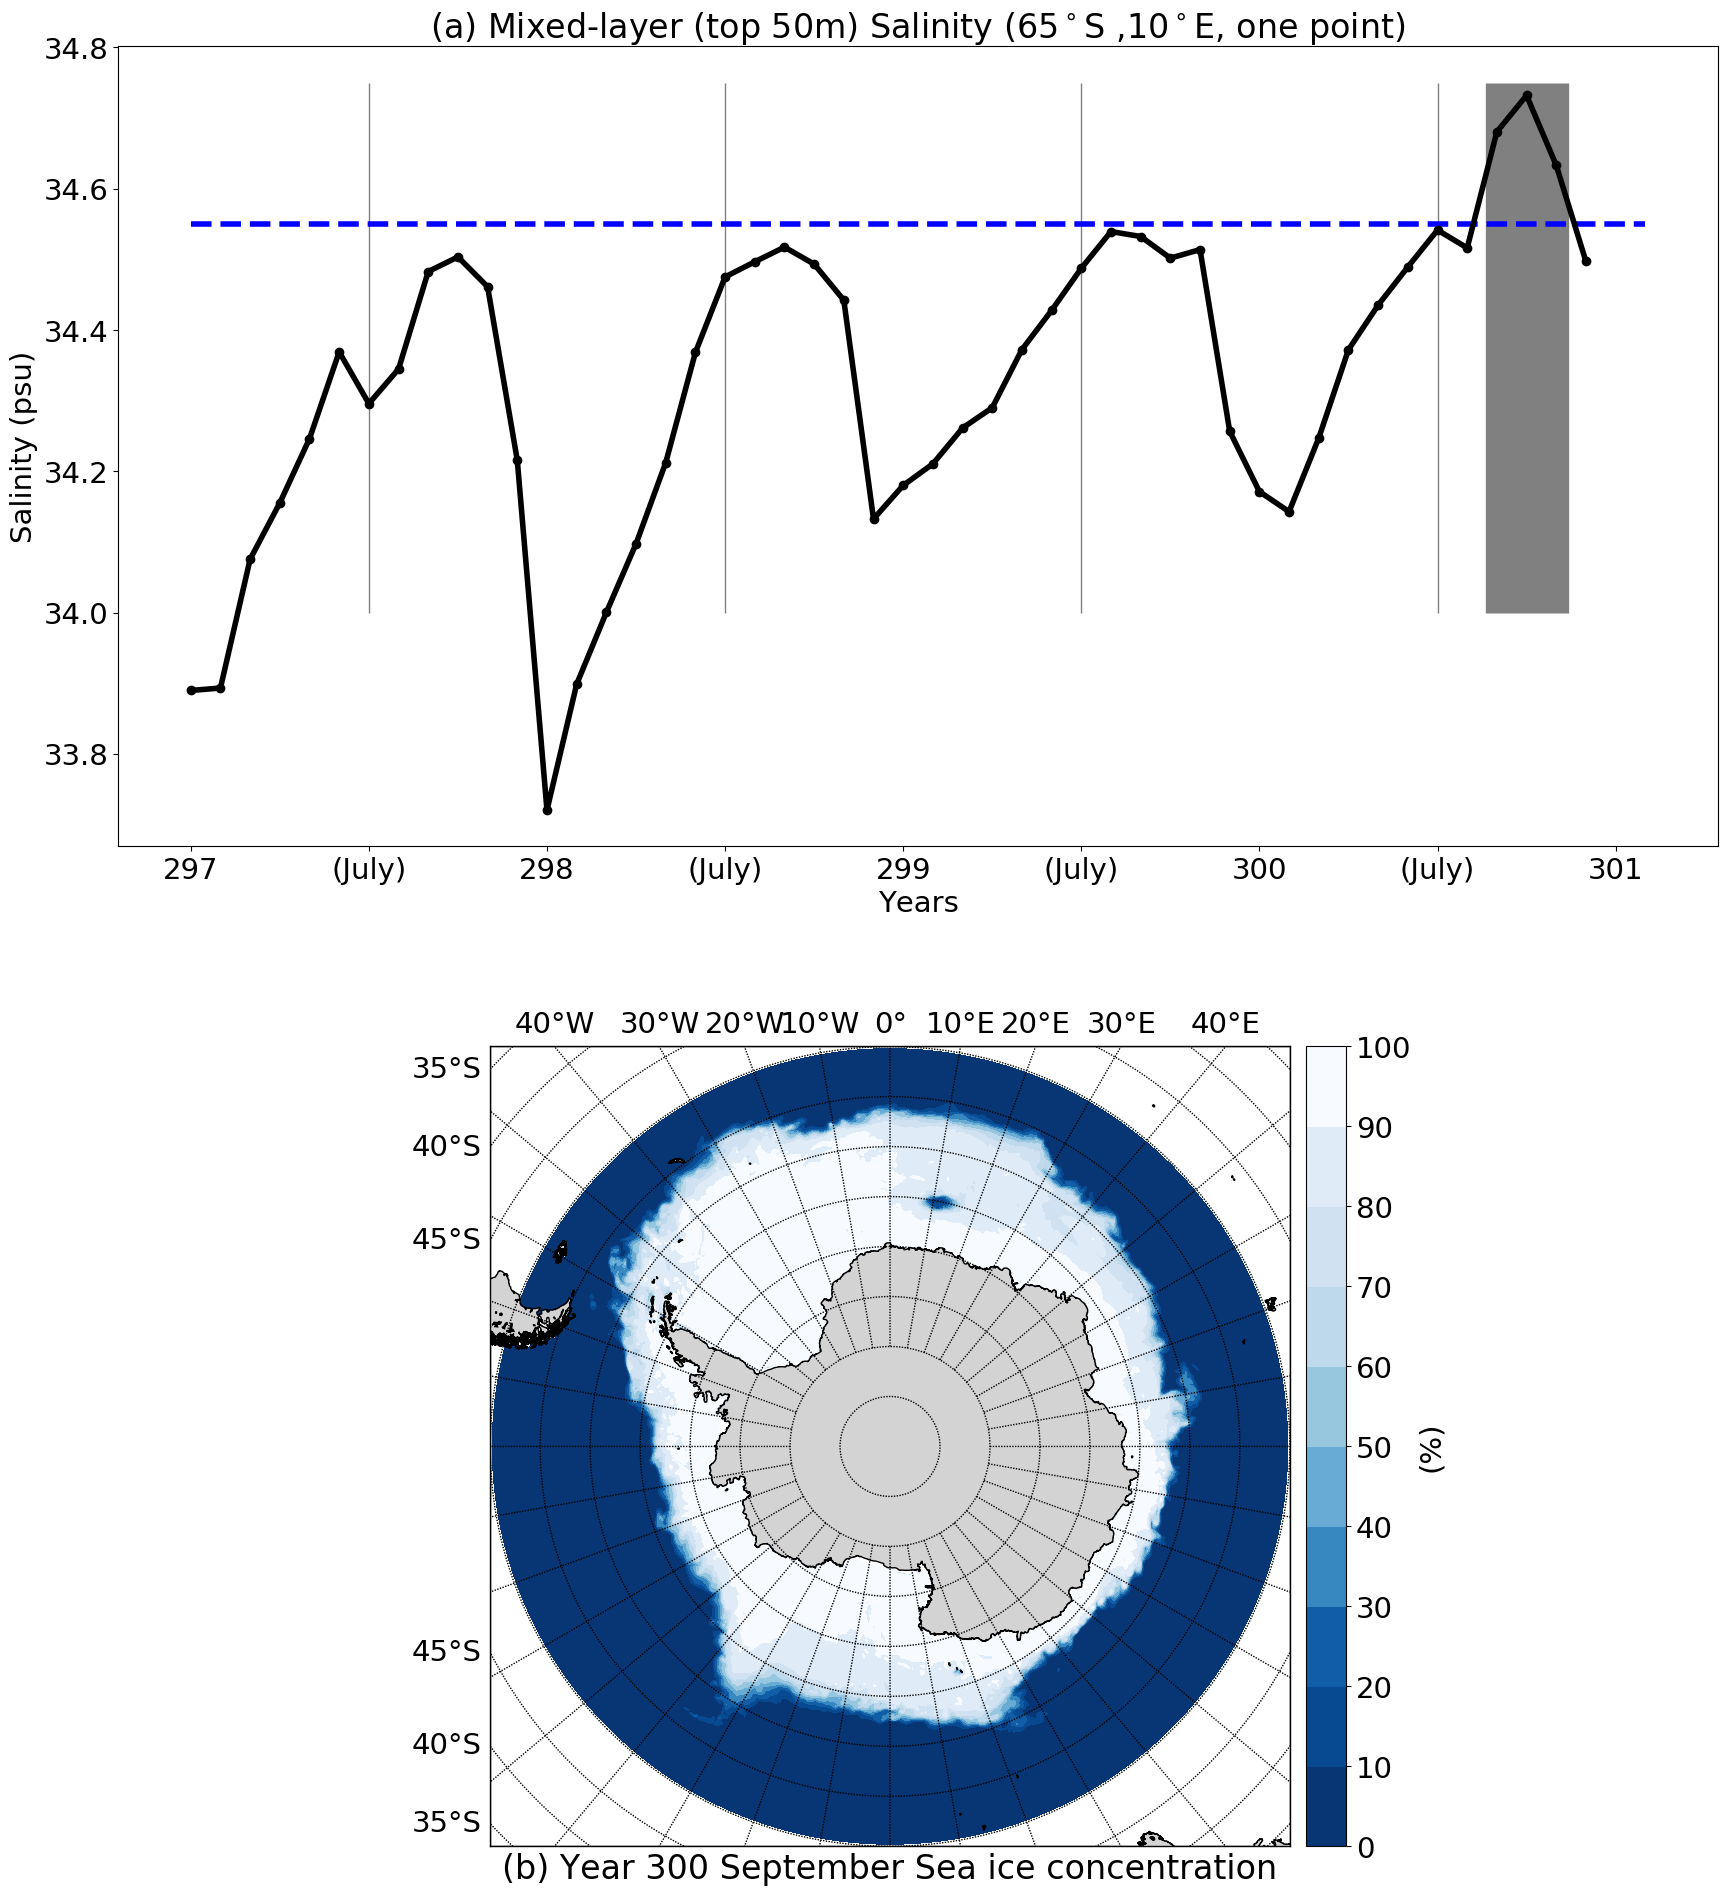

In [8]:
my_font = {'fontname':'Cambria', 'size':'21'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
################################################################
################################################################
t = np.arange(0,350,1)
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.4],
                   xticklabels=[])
ax1.plot(onepoint,'k-o',linewidth=4)

#########################################

plt.xticks(range(0,49,6), ['297','(July)','298','(July)','299','(July)','300','(July)', '301','(July)', '2008','2018','290','310','330'],**my_font)
plt.yticks(**my_font)
plt.vlines(45,34.0,34.75,  colors = "grey",linewidth=60)
plt.vlines(42,34.0,34.75,  colors = "grey",linewidth=1)
plt.vlines(30,34.0,34.75,  colors = "grey",linewidth=1)
plt.vlines(18,34.0,34.75,  colors = "grey",linewidth=1)
plt.vlines(6,34.0,34.75,  colors = "grey",linewidth=1)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Salinity (psu)',color= 'k',**my_font)
plt.hlines(34.55, 0, 49, colors = "b",linestyles = "dashed",linewidth=4)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)
plt.axis("tight")
#plt.plot([0,-ww2[0]],[320,2300])
ax1.set_title('(a) Mixed-layer (top 50m) Salinity (65$^\circ$S ,10$^\circ$E, one point)',fontsize = '24')
###########################################
ax2 = fig.add_axes([0.1, 0.4, 0.8, 0.4],
                   xticklabels=[])
#my_font = {'fontname':'Cambria', 'size':'40'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
              #width = 10000000,height = 15000000,resolution ='h')     
              width = 8900000,height = 8900000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar,range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels)
#x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'black',linewidth=8)

#CS=map.contour(x,y,plotvar2,[0.1,0.3],colors = 'green', linestyles = 'solid',linewidths=2)
#plt.clabel(CS,fontsize=30,fmt='%1.1f')

cbar =map.colorbar(CP,ticks = nice_levels)
cbar.ax.tick_params(labelsize=21) 
cbar.set_label('(%)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
plt.xlabel("(b) Year 300 September Sea ice concentration",fontsize = '24')
plt.savefig("ice30009newnew.png",bbox_inches='tight')

In [9]:
onepoint

array([33.88961411, 33.89307022, 34.07543945, 34.15520477, 34.24611664,
       34.36896133, 34.29577637, 34.34474564, 34.48274994, 34.50347137,
       34.46122742, 34.21561432, 33.72027206, 33.89849091, 34.00014877,
       34.09724045, 34.21209717, 34.36816788, 34.47512817, 34.4965744 ,
       34.51735687, 34.49332428, 34.44226837, 34.13246155, 34.17998886,
       34.21047592, 34.26120758, 34.28998566, 34.37225723, 34.42774582,
       34.48738861, 34.53940964, 34.53236389, 34.50176239, 34.51386261,
       34.25659561, 34.1711998 , 34.1428299 , 34.24710846, 34.37207794,
       34.43523788, 34.489254  , 34.54154968, 34.51621628, 34.68059158,
       34.73212814, 34.63323975, 34.49708557])

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


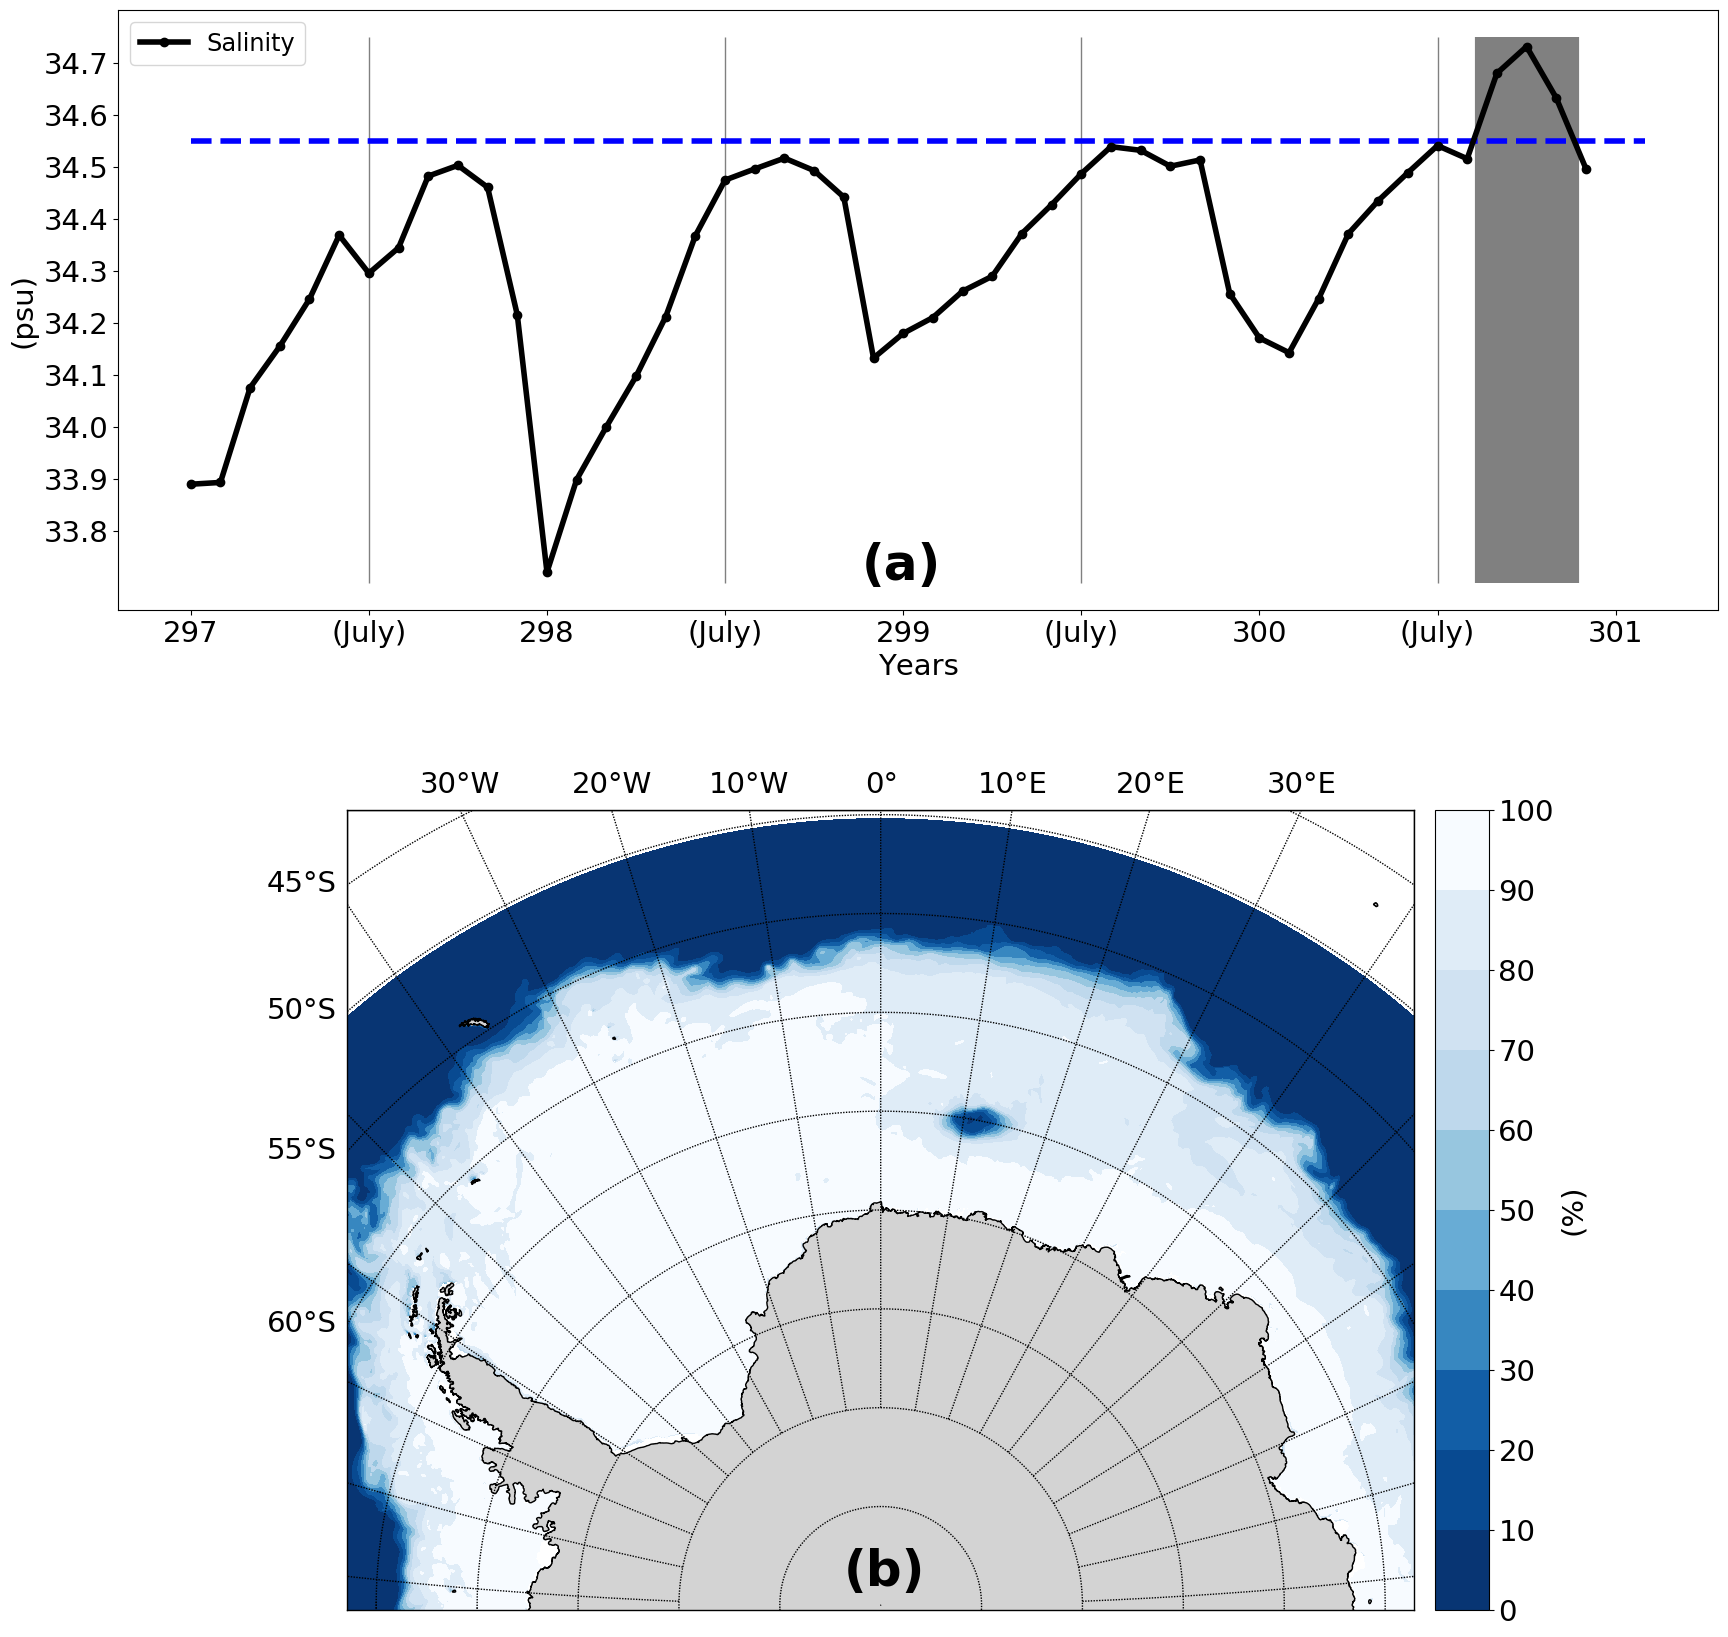

In [31]:
my_font = {'fontname':'Cambria', 'size':'21'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
################################################################
################################################################
t = np.arange(0,350,1)
ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.3],
                   xticklabels=[])
ax1.plot(onepoint,'k-o',linewidth=4,label='Salinity')
plt.legend(loc='upper left',fontsize='xx-large')
#########################################

plt.xticks(range(0,49,6), ['297','(July)','298','(July)','299','(July)','300','(July)', '301','(July)', '2008','2018','290','310','330'],**my_font)
plt.yticks(**my_font)
plt.vlines(45,33.7,34.75,  colors = "grey",linewidth=75)
plt.vlines(42,33.7,34.75,  colors = "grey",linewidth=1)
plt.vlines(30,33.7,34.75,  colors = "grey",linewidth=1)
plt.vlines(18,33.7,34.75,  colors = "grey",linewidth=1)
plt.vlines(6,33.7,34.75,  colors = "grey",linewidth=1)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('(psu)',color= 'k',**my_font)
plt.hlines(34.55, 0, 49, colors = "b",linestyles = "dashed",linewidth=4)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)
plt.axis("tight")
plt.yticks(np.arange(33.8,34.8,0.1), ['33.8','33.9','34.0','34.1','34.2', '34.3', '34.4','34.5','34.6','34.7','34.8'],**my_font)
#plt.plot([0,-ww2[0]],[320,2300])
#ax1.set_title('(a) Upper Ocean Salinity (65$^\circ$S ,10$^\circ$E, one grid point)',fontsize = '24')
ax1.text(0.465, 0.05, '(a)', transform=ax1.transAxes,size=36, weight='bold')
###########################################
ax2 = fig.add_axes([0.1, 0.4, 0.8, 0.4],
                   xticklabels=[])
#my_font = {'fontname':'Cambria', 'size':'40'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -70, lon_0 = 0,area_thresh = 100,\
              #width = 10000000,height = 15000000,resolution ='h')     
              width = 6000000,height = 4500000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar,range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels)
#x2,y2=map(lont2,latt2)
#map.plot(x2,y2,'black',linewidth=8)

#CS=map.contour(x,y,plotvar2,[0.1,0.3],colors = 'green', linestyles = 'solid',linewidths=2)
#plt.clabel(CS,fontsize=30,fmt='%1.1f')

cbar =map.colorbar(CP,ticks = nice_levels)
cbar.ax.tick_params(labelsize=21) 
cbar.set_label('(%)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
#plt.xlabel("(b) Year 300 September Sea ice concentration",fontsize = '24')
ax2.text(0.465, 0.03, '(b)', transform=ax2.transAxes,size=36, weight='bold')
plt.savefig("ice30009newnew.png",bbox_inches='tight')

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


NameError: name 'plotvar2' is not defined

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


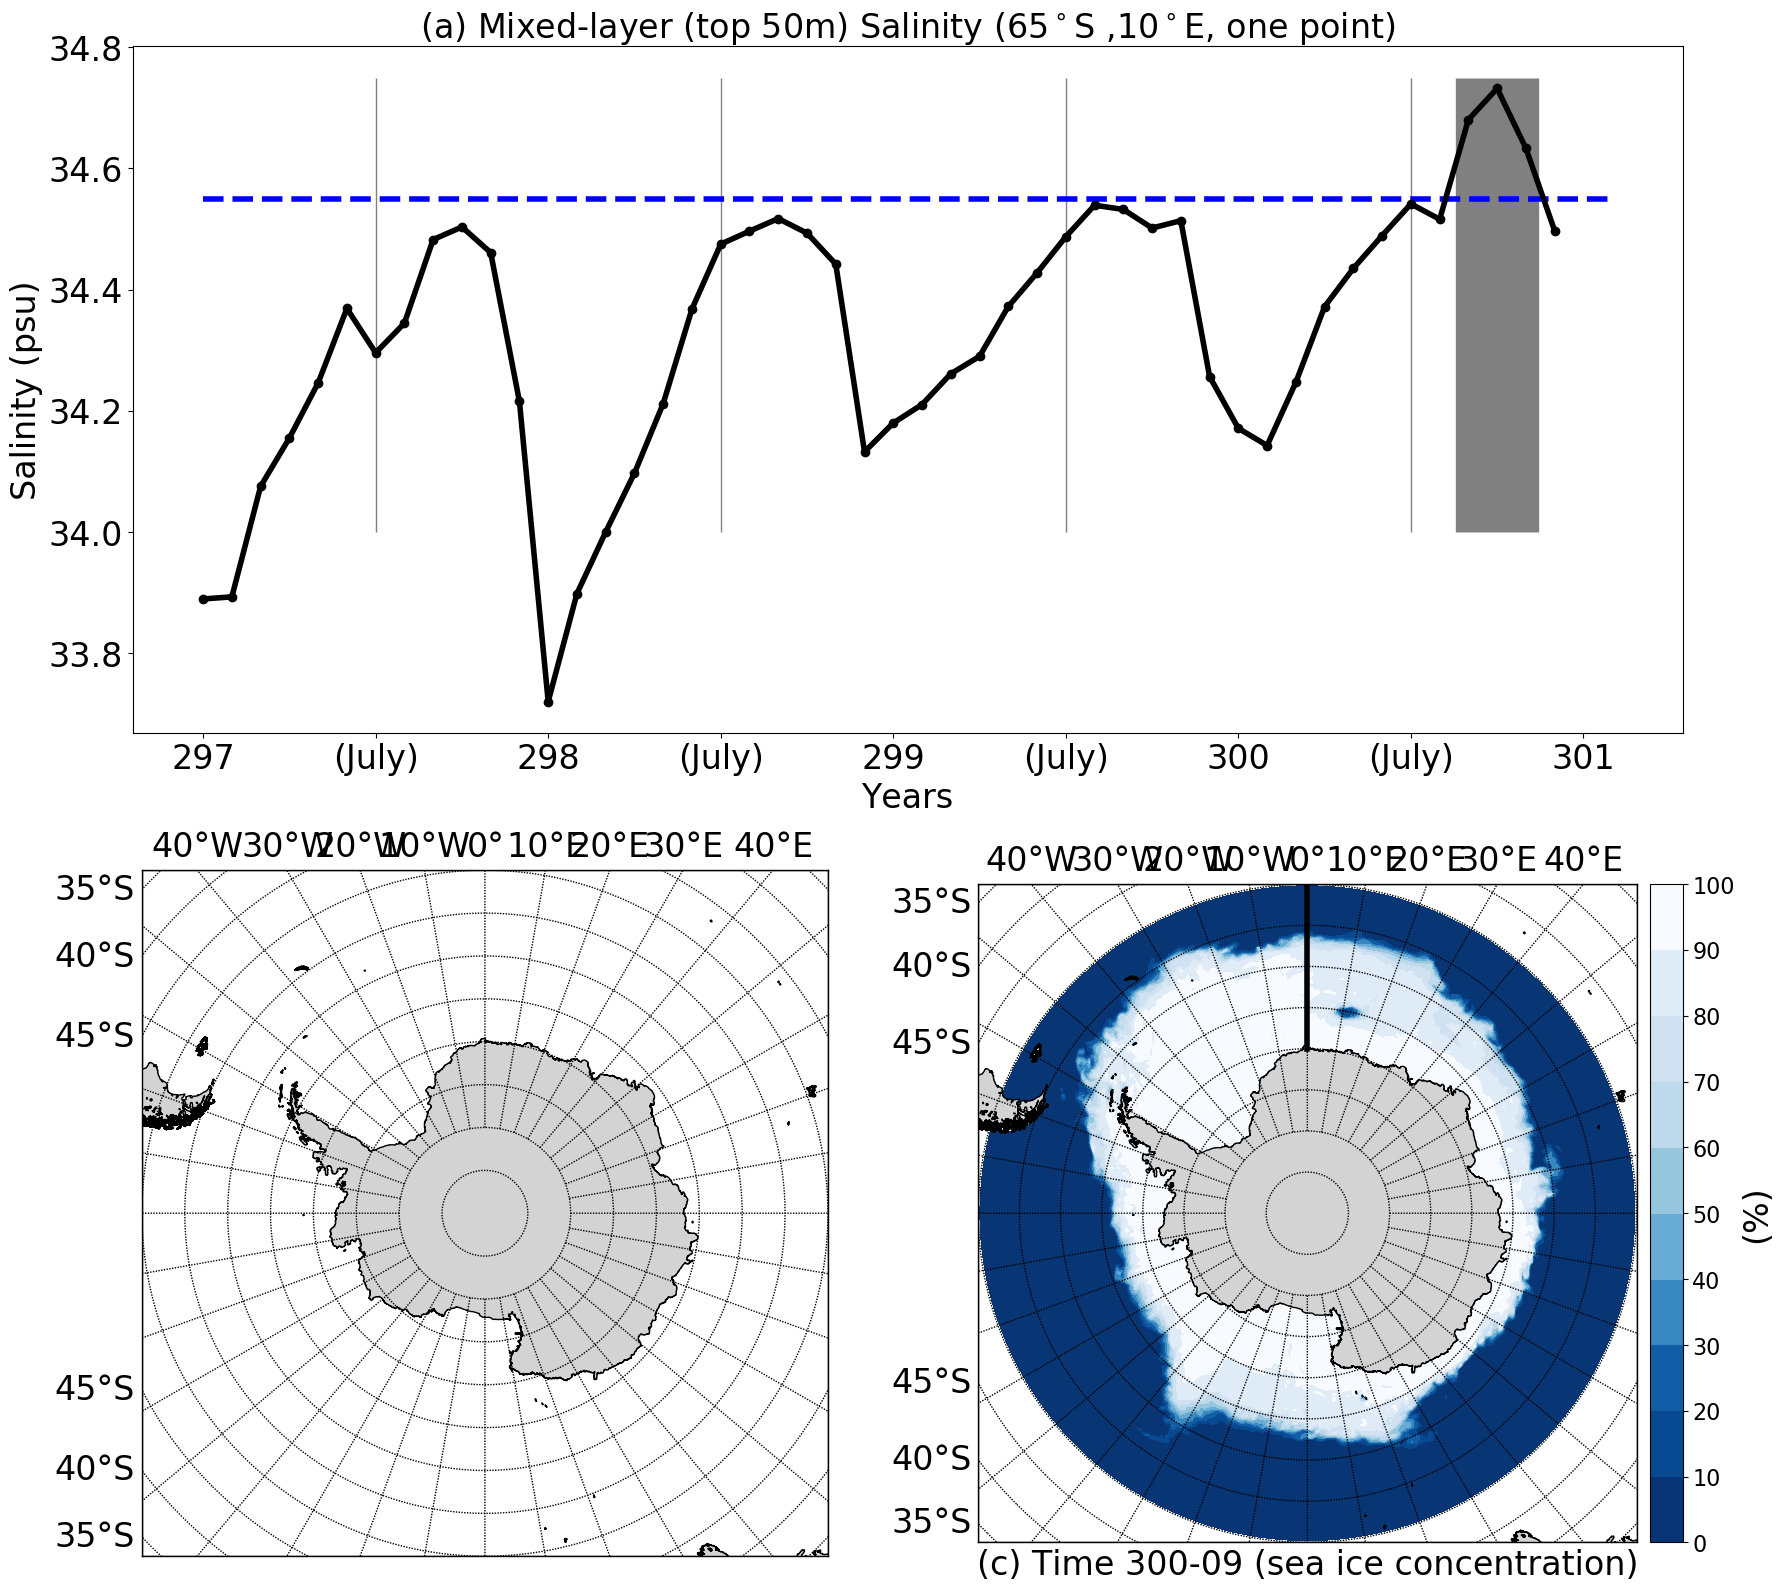

In [11]:
#my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,20), dpi=100)
ax1 = plt.subplot(2, 1, 1)
ax1.plot(onepoint,'k-o',linewidth=4)
my_font = {'fontname':'Cambria', 'size':'24'}
#########################################

plt.xticks(range(0,49,6), ['297','(July)','298','(July)','299','(July)','300','(July)', '301','(July)', '2008','2018','290','310','330'],**my_font)
plt.yticks(**my_font)
plt.vlines(45,34.0,34.75,  colors = "grey",linewidth=60)
plt.vlines(42,34.0,34.75,  colors = "grey",linewidth=1)
plt.vlines(30,34.0,34.75,  colors = "grey",linewidth=1)
plt.vlines(18,34.0,34.75,  colors = "grey",linewidth=1)
plt.vlines(6,34.0,34.75,  colors = "grey",linewidth=1)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Salinity (psu)',color= 'k',**my_font)
plt.hlines(34.55, 0, 49, colors = "b",linestyles = "dashed",linewidth=4)
#plt.hlines(mean, 0, 2160, colors = "k",linestyles = "dashed",linewidth=4)
plt.axis("tight")
#plt.plot([0,-ww2[0]],[320,2300])
ax1.set_title('(a) Mixed-layer (top 50m) Salinity (65$^\circ$S ,10$^\circ$E, one point)',fontsize = '24')
#############################################################################
ax2 = plt.subplot(2, 2, 4)
my_font = {'fontname':'Cambria', 'size':'24'}
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
              #width = 10000000,height = 15000000,resolution ='h')     
              width = 8900000,height = 8900000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar,range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels)
x2,y2=map(lont2,latt2)
map.plot(x2,y2,'black',linewidth=4)

#CS=map.contour(x,y,plotvar2,[0.1,0.3],colors = 'green', linestyles = 'solid',linewidths=2)
#plt.clabel(CS,fontsize=30,fmt='%1.1f')

cbar =map.colorbar(CP,ticks = nice_levels)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('(%)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
plt.xlabel("(c) Time 300-09 (sea ice concentration)",fontsize = '24')
################################################################
ax3 = plt.subplot(2, 2, 3)
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
              #width = 10000000,height = 15000000,resolution ='h')     
              width = 8900000,height = 8900000,resolution ='h') 
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar2,range(0,100),cmap = new_cmap,norm =norm,levels = nice_levels)
x2,y2=map(lont2,latt2)
map.plot(x2,y2,'black',linewidth=4)

#CS=map.contour(x,y,plotvar2,[0.1,0.3],colors = 'green', linestyles = 'solid',linewidths=2)
#plt.clabel(CS,fontsize=30,fmt='%1.1f')

cbar =map.colorbar(CP,ticks = nice_levels)
cbar.ax.tick_params(labelsize=16) 
cbar.set_label('(%)', **my_font)
#plt.suptitle("TIME 0119-10",**my_font)
plt.xlabel("(b) Time 300-07 (sea ice concentration)",fontsize = '24')
plt.savefig("ice30009newnew.png",bbox_inches='tight')

In [ ]:
data2=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0300-07.aice.nc')
plotvar2 = data2.variables['aice'][0,:,:]